In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [12]:
df = pd.read_csv("diabetes.csv")
df.head(10)
# Outcome = 1 it means "Diabet", Outcome = 0 (Healthy)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


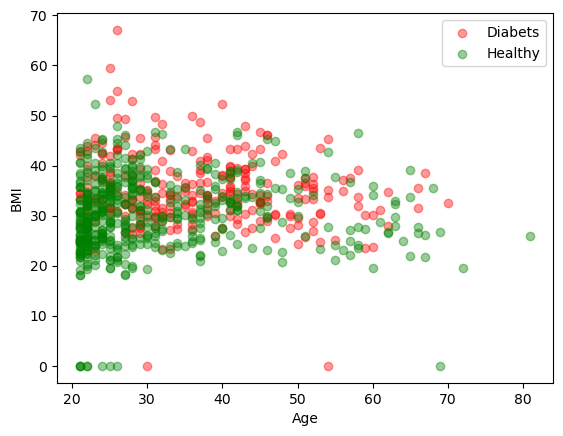

In [13]:
diabets = df[df["Outcome"] ==1]
nondiabets = df[df["Outcome"] ==0]

""" For now, let's create a sample graph based on BMI values only. At the end of our program,
our machine learning model will make predictions not just based on BMI but also on all the other data."""

plt.scatter(diabets["Age"],diabets["BMI"],color="red",label="Diabets",alpha=0.4)
plt.scatter(nondiabets["Age"],nondiabets["BMI"],color="green",label="Healthy",alpha=0.4)
plt.legend()
plt.ylabel("BMI")
plt.xlabel("Age")
plt.show()

In [25]:
x2 = df.drop(["Outcome"],axis=1)
y = df["Outcome"]
print(x2.head())
print(y.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


In [27]:
# We are performing normalization - we are updating all values within x to be between 0 and 1.
# If we don't perform normalization in this way, high numbers can overshadow small ones and mislead the KNN algorithm!

x = (x2-np.min(x2)) / (np.max(x2)-np.min(x2))

print(x.head())


   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2     0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3     0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
4     0.000000  0.688442       0.327869       0.353535  0.198582  0.642325   

   DiabetesPedigreeFunction       Age  
0                  0.234415  0.483333  
1                  0.116567  0.166667  
2                  0.253629  0.183333  
3                  0.038002  0.000000  
4                  0.943638  0.200000  


C:\Users\16088\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\16088\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\16088\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


In [41]:
"""We are splitting our data into the training set and the test set.
The training data will be used to teach the system to distinguish between healthy and sick individuals.
The test data, on the other hand, will be used to evaluate whether our machine learning model can correctly differentiate
between healthy and sick individuals."""
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1,random_state=1)
"""We set the test_size to 0.1, which means we used 90% of the data for the machine to learn (train), and we will test the remaining 10%.
We will assess how accurately it calculates."""

KNN = KNeighborsClassifier(n_neighbors= 3) # n_neighbors = k
KNN.fit(x_train,y_train)
prediciton = KNN.predict(x_test)
print(f"The validation test results for K=3 : % {KNN.score(x_test,y_test)*100} ")





The validation test results for K=3 : % 83.11688311688312 


In [40]:
# How can we decide the number?
# let's find the best k number for our dataset

for i in range(1,10):
    KNN = KNeighborsClassifier(n_neighbors= i) # n_neighbors = k
    KNN.fit(x_train,y_train)
    prediciton = KNN.predict(x_test)
    print(f"The validation test results for K= {i} : % {KNN.score(x_test,y_test)*100}  ")
    
# We can choose 3 for k number it means the machine estimate aroubd 83% correctly
    
    

The validation test results for K= 1 : % 71.42857142857143  
The validation test results for K= 2 : % 71.42857142857143  
The validation test results for K= 3 : % 83.11688311688312  
The validation test results for K= 4 : % 80.51948051948052  
The validation test results for K= 5 : % 81.81818181818183  
The validation test results for K= 6 : % 83.11688311688312  
The validation test results for K= 7 : % 80.51948051948052  
The validation test results for K= 8 : % 80.51948051948052  
The validation test results for K= 9 : % 79.22077922077922  


In [46]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [47]:
df.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1


In [52]:
# let's predict
new_data = [1,85,66,29,0,25,0.35,30]
new_data = (new_data - np.min(x2)) / (np.max(x2) - np.min(x2))
predicted_outcome = KNN.predict([new_data])
print("Predicted Outcome:", predicted_outcome)

Predicted Outcome: [0]


C:\Users\16088\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\16088\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\16088\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\16088\anaconda3\lib\site-packages\sklearn\base.py:42